# **Python for Acoustic Phonetics**
In this notebook, I attempt to analyze a popular Javanese swear word, namely "jancuk". This swear word is pragmatically equivalent to "fuck" in some cases, especially when expressed with strong emotions, but it is not my intention to analyze the word equivalent here. Instead, my specific purpose is to implement a phonetic analysis with Python, especially `parselmouth` (Jadoul et al. [2018](https://doi.org/10.1016/j.wocn.2018.07.001). But why doing a phonetic analysis with Python when Praat (Boersma & van Heuven, [2001](https://www.fon.hum.uva.nl/paul/papers/speakUnspeakPraat_glot2001.pdf)) can do this? Praat is a cool tool with great functionalities but I still do not know how I can make my analysis on Praat is more reproducible by others so while figuring this out on Praat, I implement this Python library to perform the same tasks as in Praat.

As I have done an analysis on Praat, I will embed the output on this notebook so that the output with the software and the Python library can be compared.

In [ ]:
!pip install -q praat-parselmouth matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 33.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Audio, Image, display
import parselmouth as pm
import sys
plt.style.use('ggplot')

In [ ]:
# mount to GD
drive.mount('/content/drive', force_remount=True)
print(f'Current wd: {os.getcwd()}')

Mounted at /content/drive
Current wd: /content


In [ ]:
# change directory
os.chdir('drive/MyDrive/PORTFOLIOS/NLP-PROJECTS/PYTHON-FOR-LINGUISTICS/python-for-linguistic-analysis')
print(f'Current wd: {os.getcwd()}')

Current wd: /content/drive/MyDrive/PORTFOLIOS/NLP-PROJECTS/PYTHON-FOR-LINGUISTICS/python-for-linguistic-analysis


In [ ]:
os.listdir('./src')

['phonetics.py']

In [ ]:
sys.path.append('./src')
from phonetics import draw_spectrogram, draw_pitch, draw_intensity

In [ ]:
# get list of items
os.listdir('./data')

['kata-mutiara.mp3']

In [ ]:
# import audio file
snd = pm.Sound('./data/kata-mutiara.mp3')

# check for listening
Audio(data=snd, rate=snd.sampling_frequency)

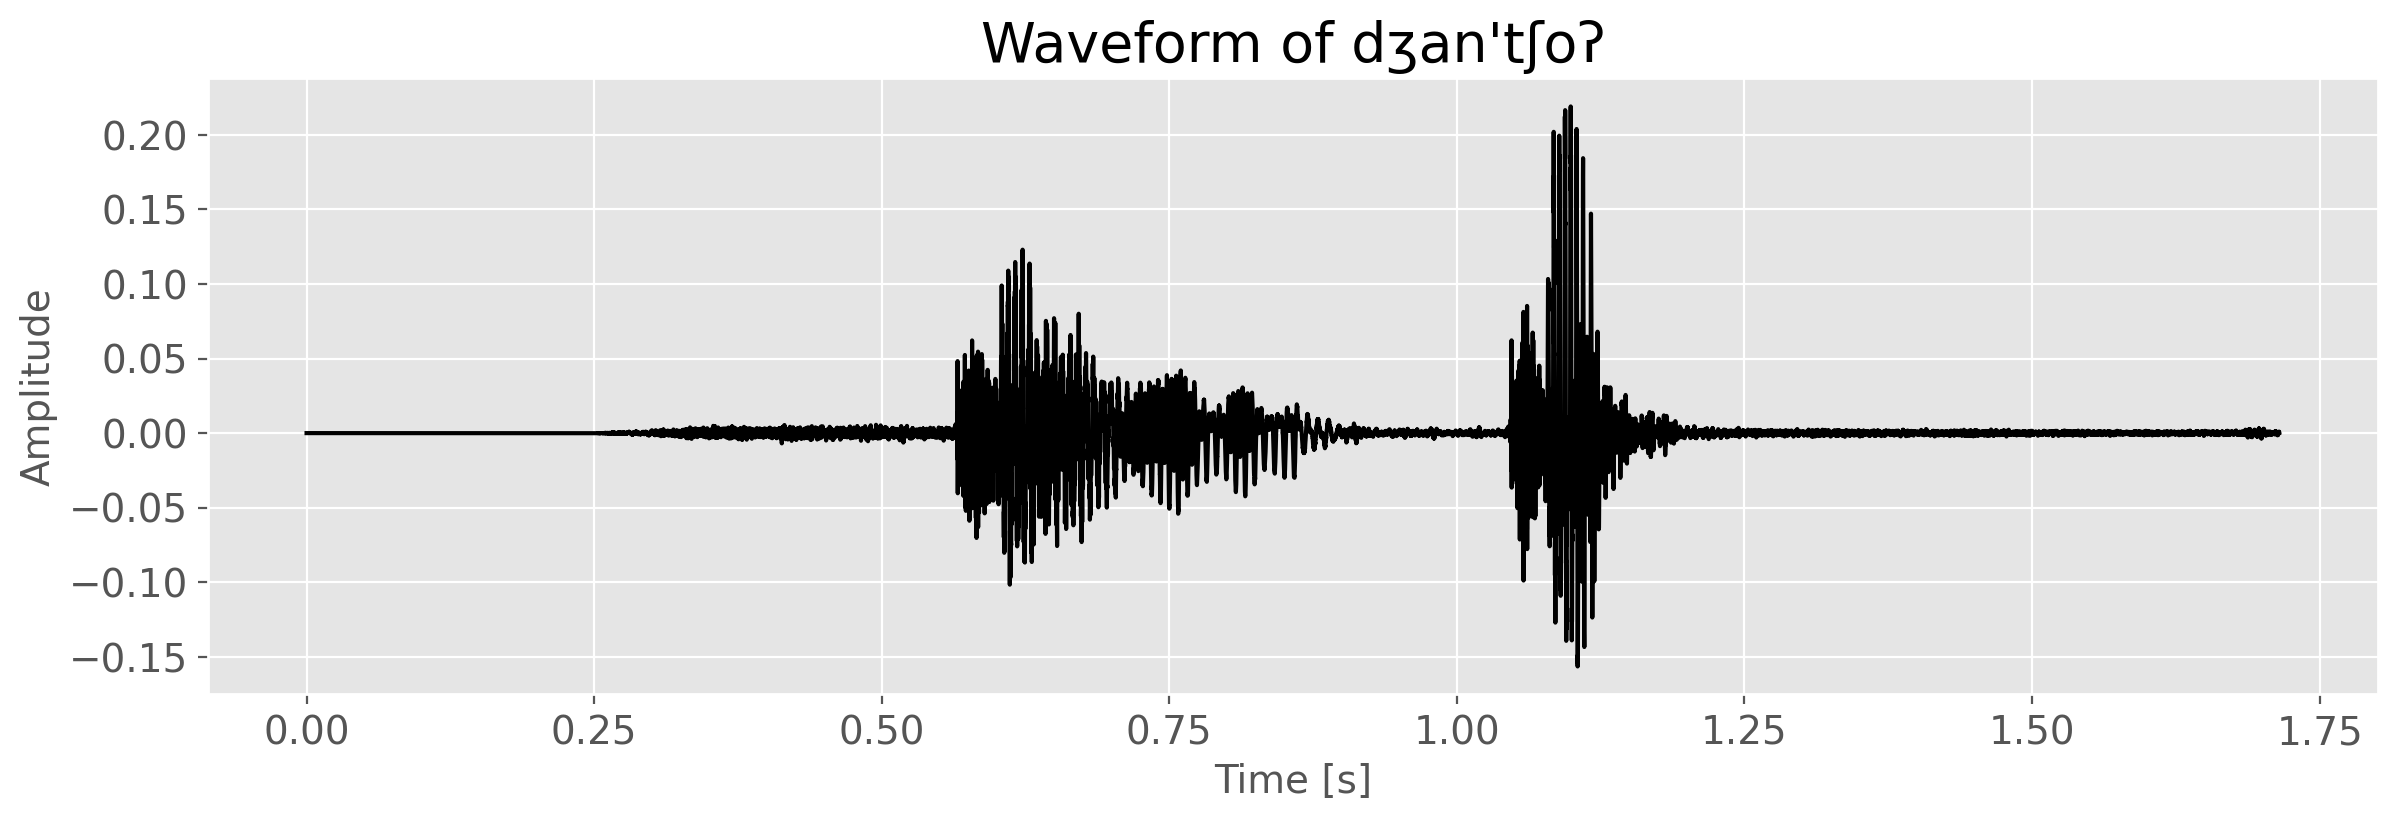

In [ ]:
plt.figure(figsize=(14, 4), dpi=200)
plt.plot(snd.xs(), snd.values.T, color='black')
plt.grid(True)
plt.xticks(fontsize=14)
plt.xlabel('Time [s]', size=14)
plt.yticks(fontsize=14)
plt.ylabel('Amplitude', size=14)
plt.title('Waveform of dʒan\'tʃoʔ', size=20)
plt.show()

**Comment**
- The waveform shows the variation in amplitude over time (seconds). It indicates the intensity of sound with refence of production time. In general, the louder sound, the larger the amplitude is. The intensity of the amplitude is represented by the ups and downs of the line.
- It helps understand the pauses and stress in pronunciation. For example, in swear word "jancuk" \[dʒan'tʃoʔ] consists of two syllables, namely \[dʒan] and \[tʃoʔ], where the two syllables can be identified by a pause between them. Among these two syllables, the second one is more stressed than the first as indicated by the greater amplitude.
- Nonetheless, it is important to note that the audio contains unnecessary sound, especially at the beginning and the far end. For this reason, the most essential part of the audio can be extracted.

In [ ]:
# filter necessary part
snd_filtered = snd.extract_part(from_time=0.50, to_time=1.25, preserve_times=True)
Audio(data=snd_filtered, rate=snd_filtered.sampling_frequency)

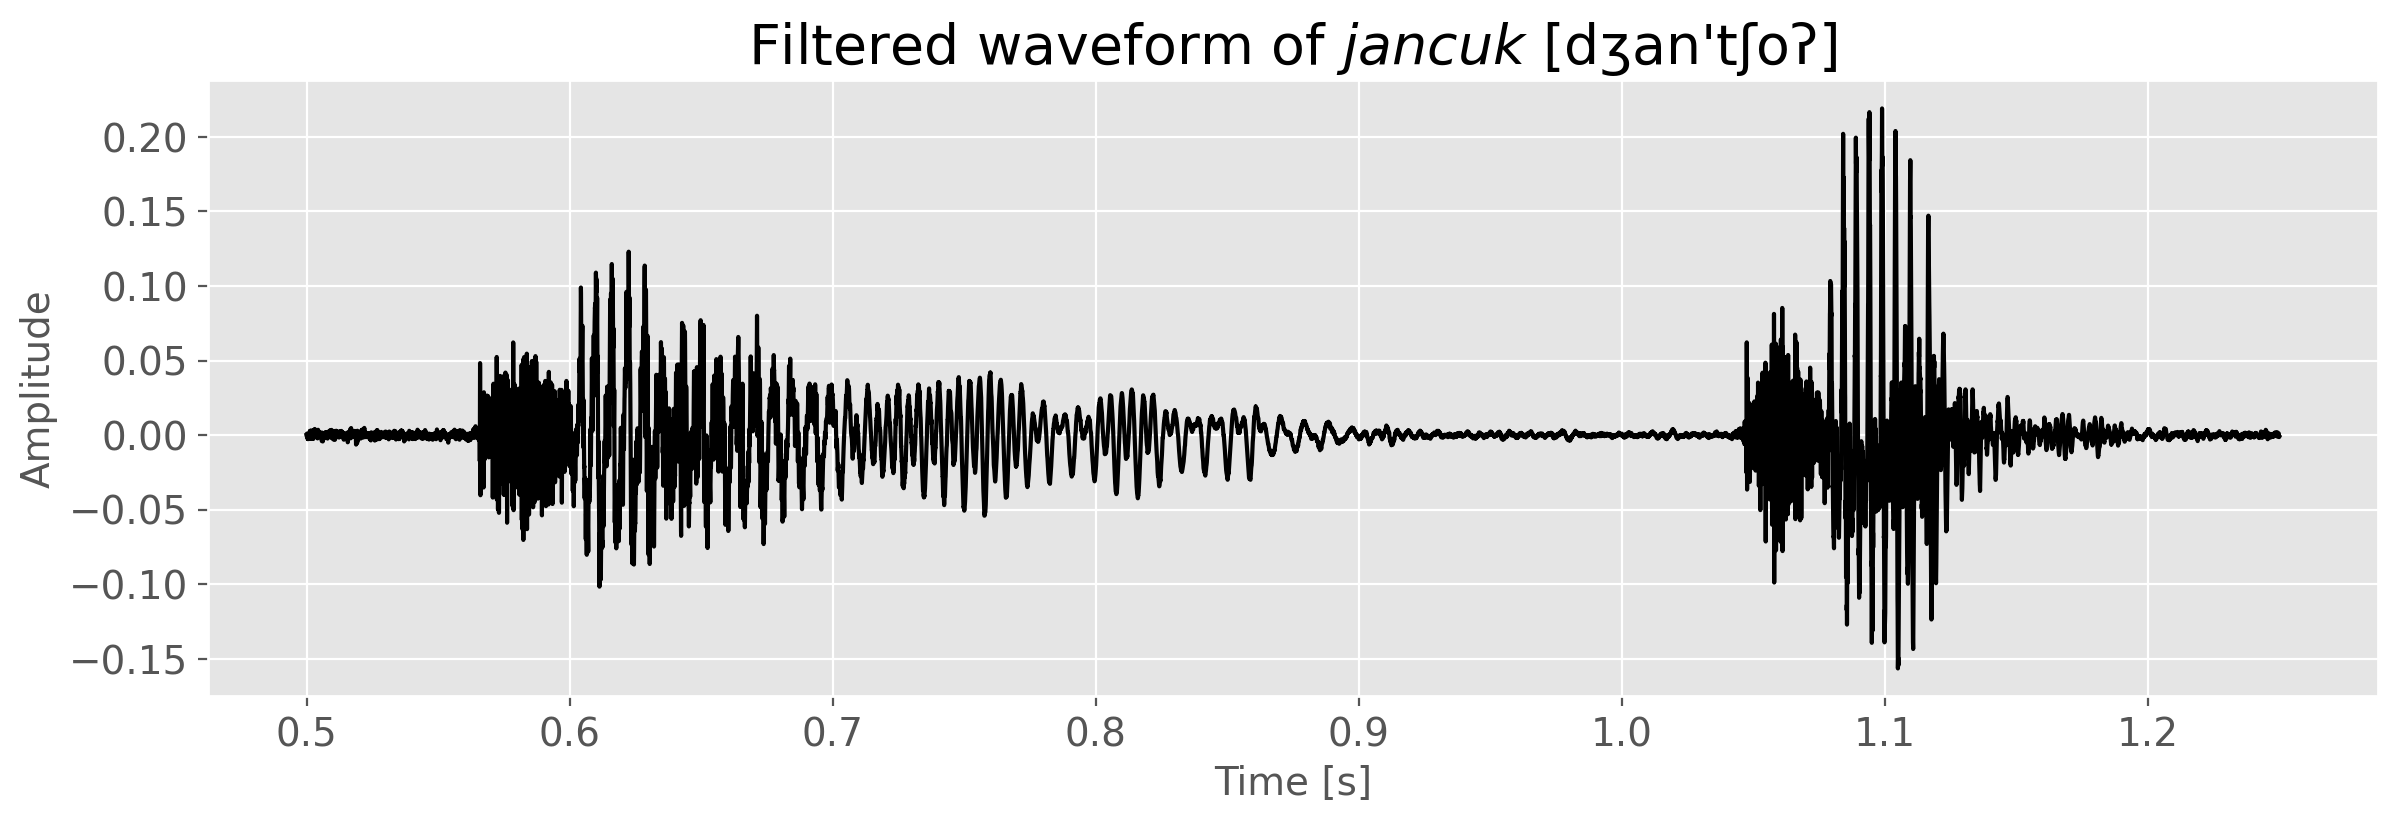

In [25]:
plt.figure(figsize=(14, 4), dpi=200)
plt.plot(snd_filtered.xs(), snd_filtered.values.T, color='black')
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Time [s]', size=14)
plt.ylabel('Amplitude', size=14)
plt.title('Filtered waveform of $jancuk$ [dʒan\'tʃoʔ]', size=20)
plt.show()

**Comment**
- After obtaining the desired audio length, representing the essential part of the audio for a further exploration such as the spectogram (frequencies), pitch, and intensity.
- In short, spectogram similar to waveform visualizes frequency over time and the intensity. The darker the color, the higher the intensity is. Spectogram can be used to identify the manner as well as place of articulation in consonants. In terms of manner of articulation, stop sound can be identified by a brief closure and followed by a burst. I will discuss the analysis on spectogram later.
- Pitch is the highness and lowness of sound while intensity is the perceived loudness of sound. Unlike pitch, intensity is concerned more about the amount of variation in air pressure caused by the sound. From pitch, it is possible to understand the intonation and identifying the intensity of a sound can provide an insight into prominence in words or syllable boundary.

In [ ]:
# get spectogram
spec = snd_filtered.to_spectrogram()

# get pitch
pitch = snd_filtered.to_pitch()

# get intensity
intensity = snd_filtered.to_intensity()

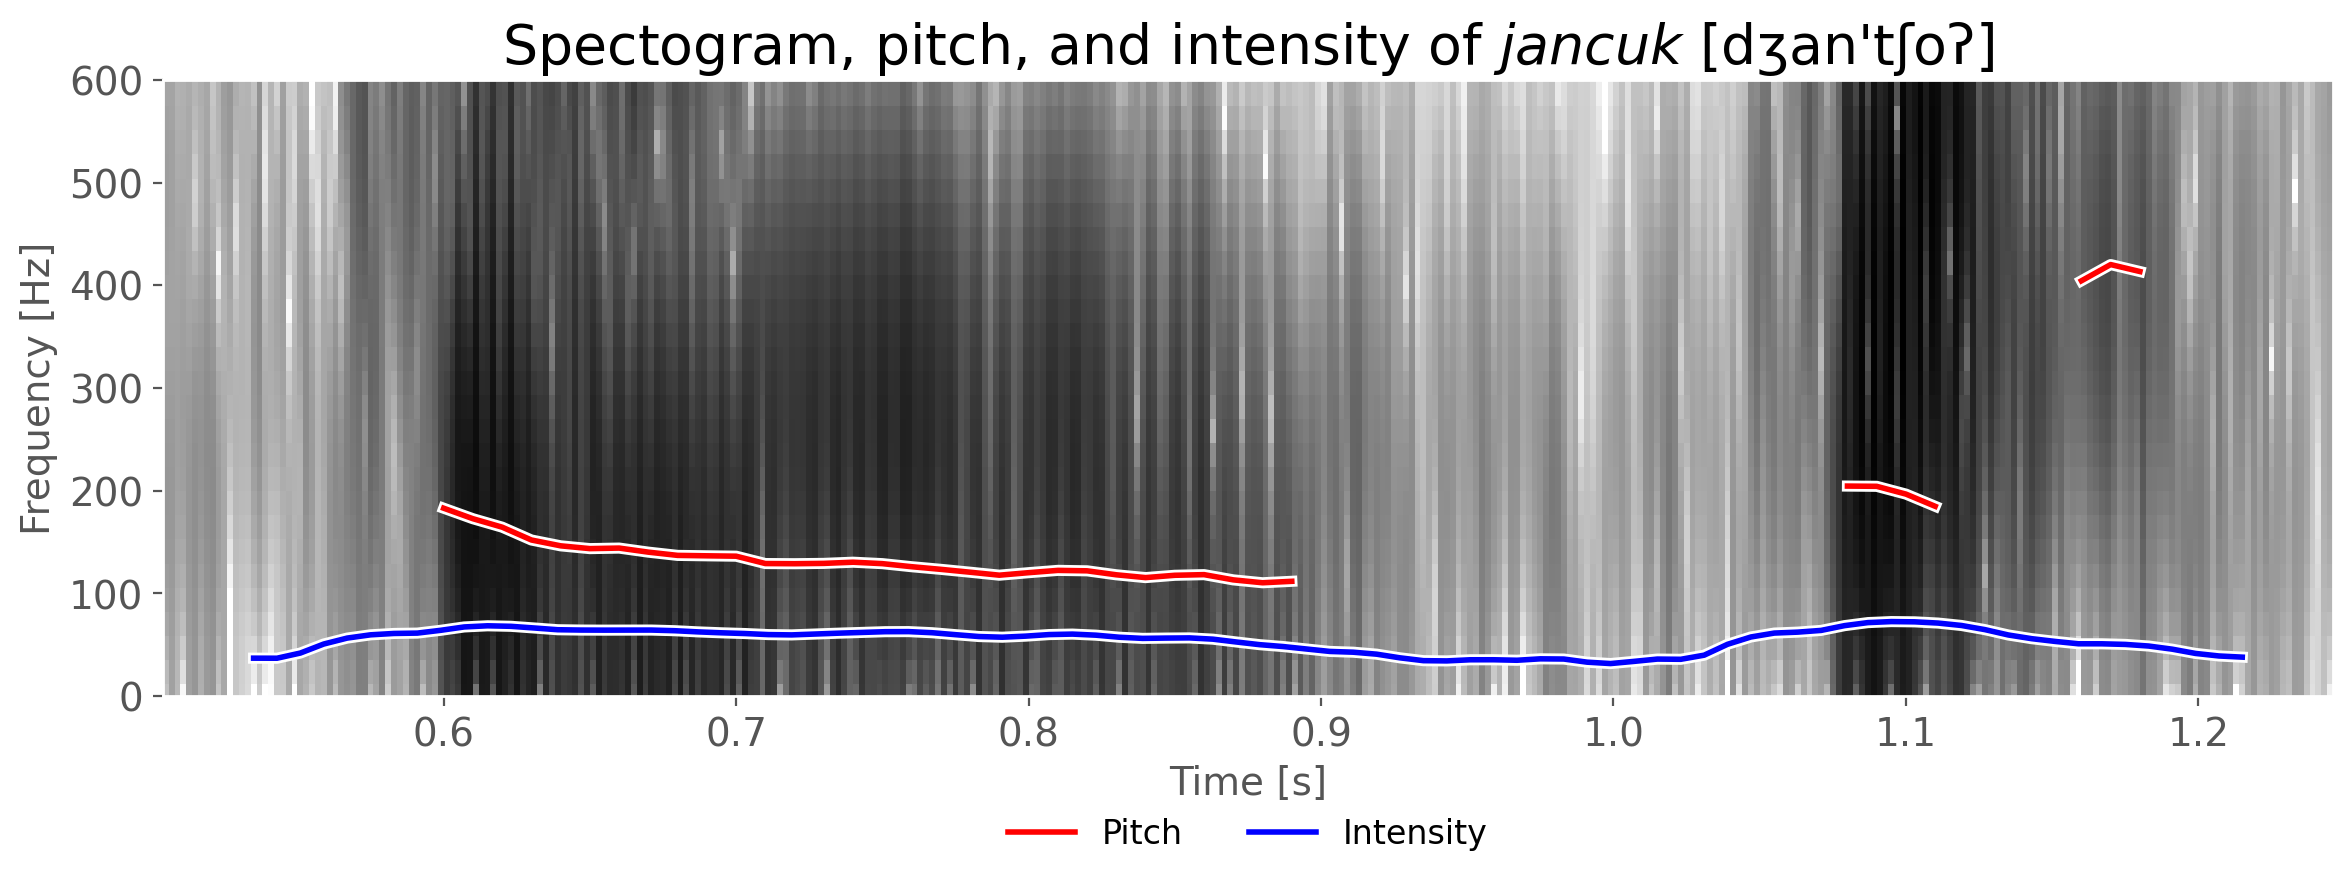

In [24]:
plt.figure(figsize=(14, 4), dpi=200)
draw_spectrogram(spec)
draw_pitch(pitch)
draw_intensity(intensity)
plt.xlabel("Time [s]", size=14)
plt.ylabel("Frequency [Hz]", size=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['Pitch', 'Intensity'], loc='lower center',
           bbox_to_anchor=(0.5, -0.3), ncols=2,
           fontsize=12, frameon=False)
plt.title('Spectogram, pitch, and intensity of $jancuk$ [dʒan\'tʃoʔ]', size=20)
plt.grid(True)
plt.show()

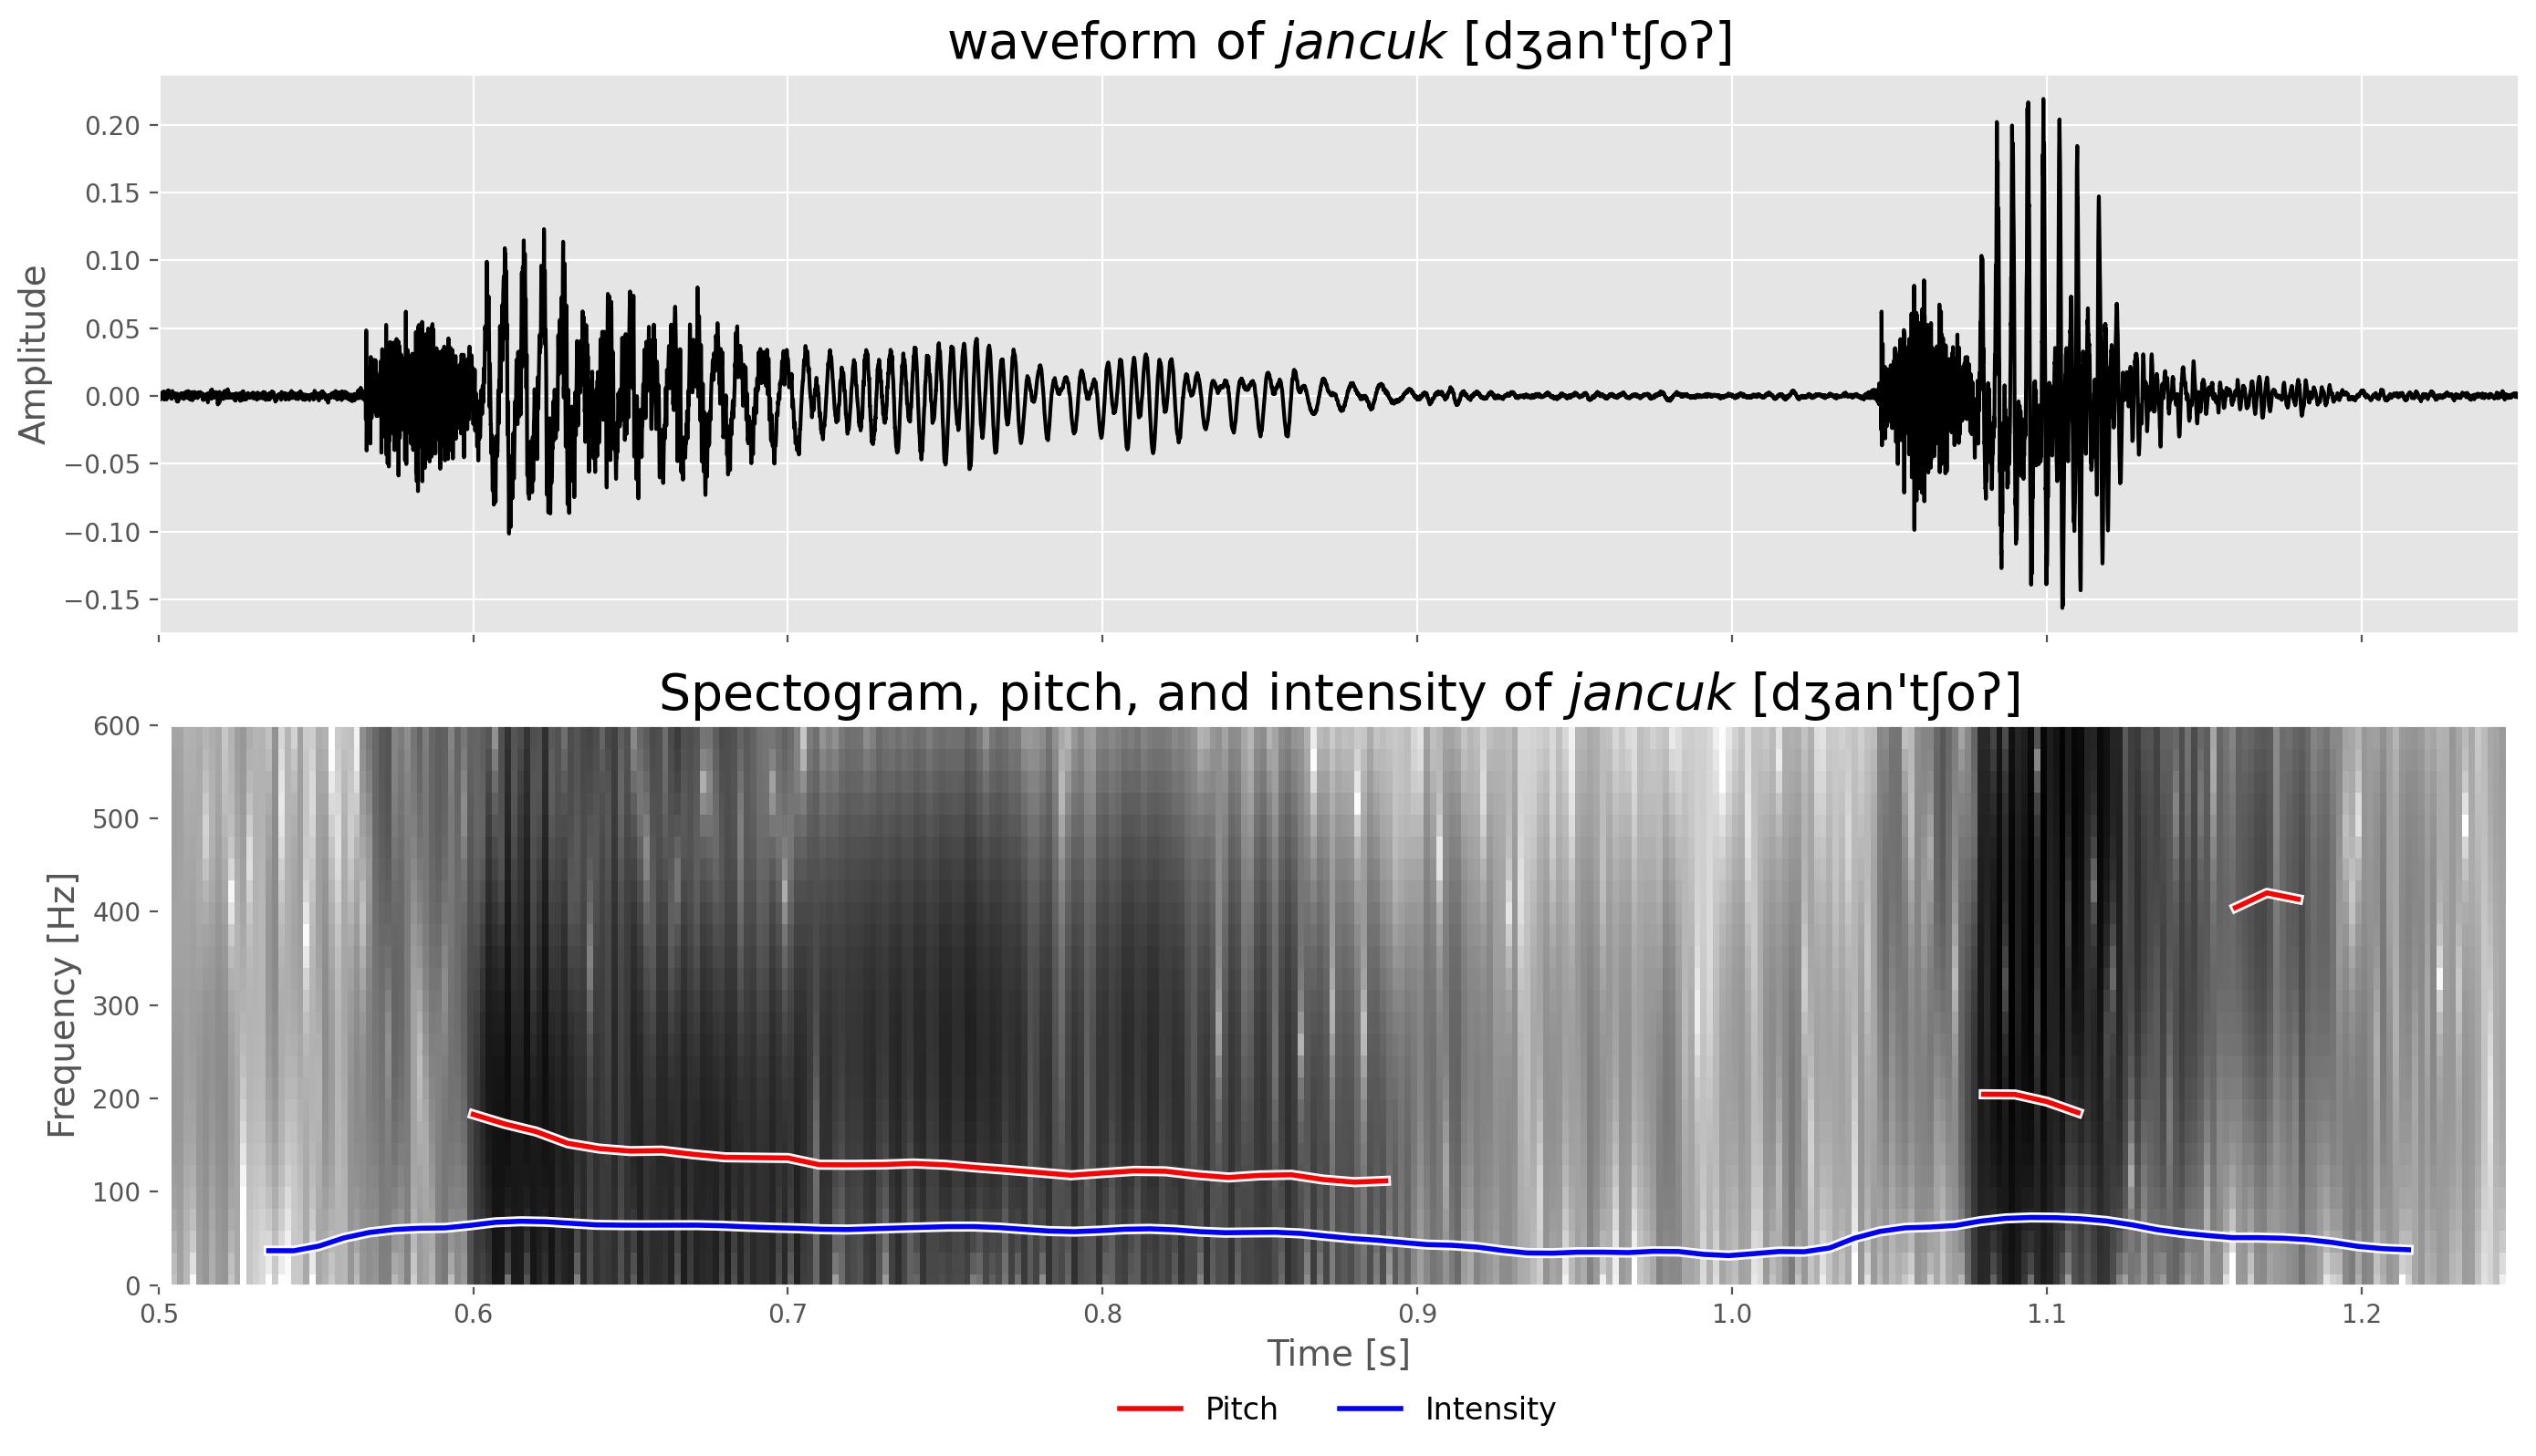

In [22]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), dpi=200, sharex=True)

# plot waveform in ax1
ax1.plot(snd_filtered.xs(), snd_filtered.values.T, color='black')
ax1.set_ylabel("Amplitude", size=14)
ax1.set_title("waveform of $jancuk$ [dʒan\'tʃoʔ]", size=20)
ax1.grid(True)

# add spectogram, pitch, and intensity
ax2.set_facecolor('none')
plt.sca(ax2)
draw_spectrogram(spec)
draw_pitch(pitch)
draw_intensity(intensity)
ax2.set_xlabel("Time [s]", size=14)
ax2.set_ylabel("Frequency [Hz]", size=14)
ax2.set_title("Spectogram, pitch, and intensity of $jancuk$ [dʒan\'tʃoʔ]", size=20)
ax2.grid(False)
ax2.legend(['Pitch', 'Intensity'], loc='lower center',
           bbox_to_anchor=(0.5, -0.3), ncols=2,
           fontsize=12, frameon=False)
x_min, x_max = 0.5, 1.25
ax1.set_xlim(x_min, x_max)
plt.tight_layout()
plt.show()

**Comment**
- The plot made with `parselmouth` is slightly different from that generated with Praat but overall, they are pretty similar, except the absence of intensity on the image below. The absence is not because there is no feature but simply I forgot adding the intensity of the swear word audio.
- Another apparent difference lies on the presence of higher pitch (<span style='color:red'>red line</span>) at the end of the sound on the image below. The possible reason is that the pitch was cut on Praat so that it is not shown on the image below.

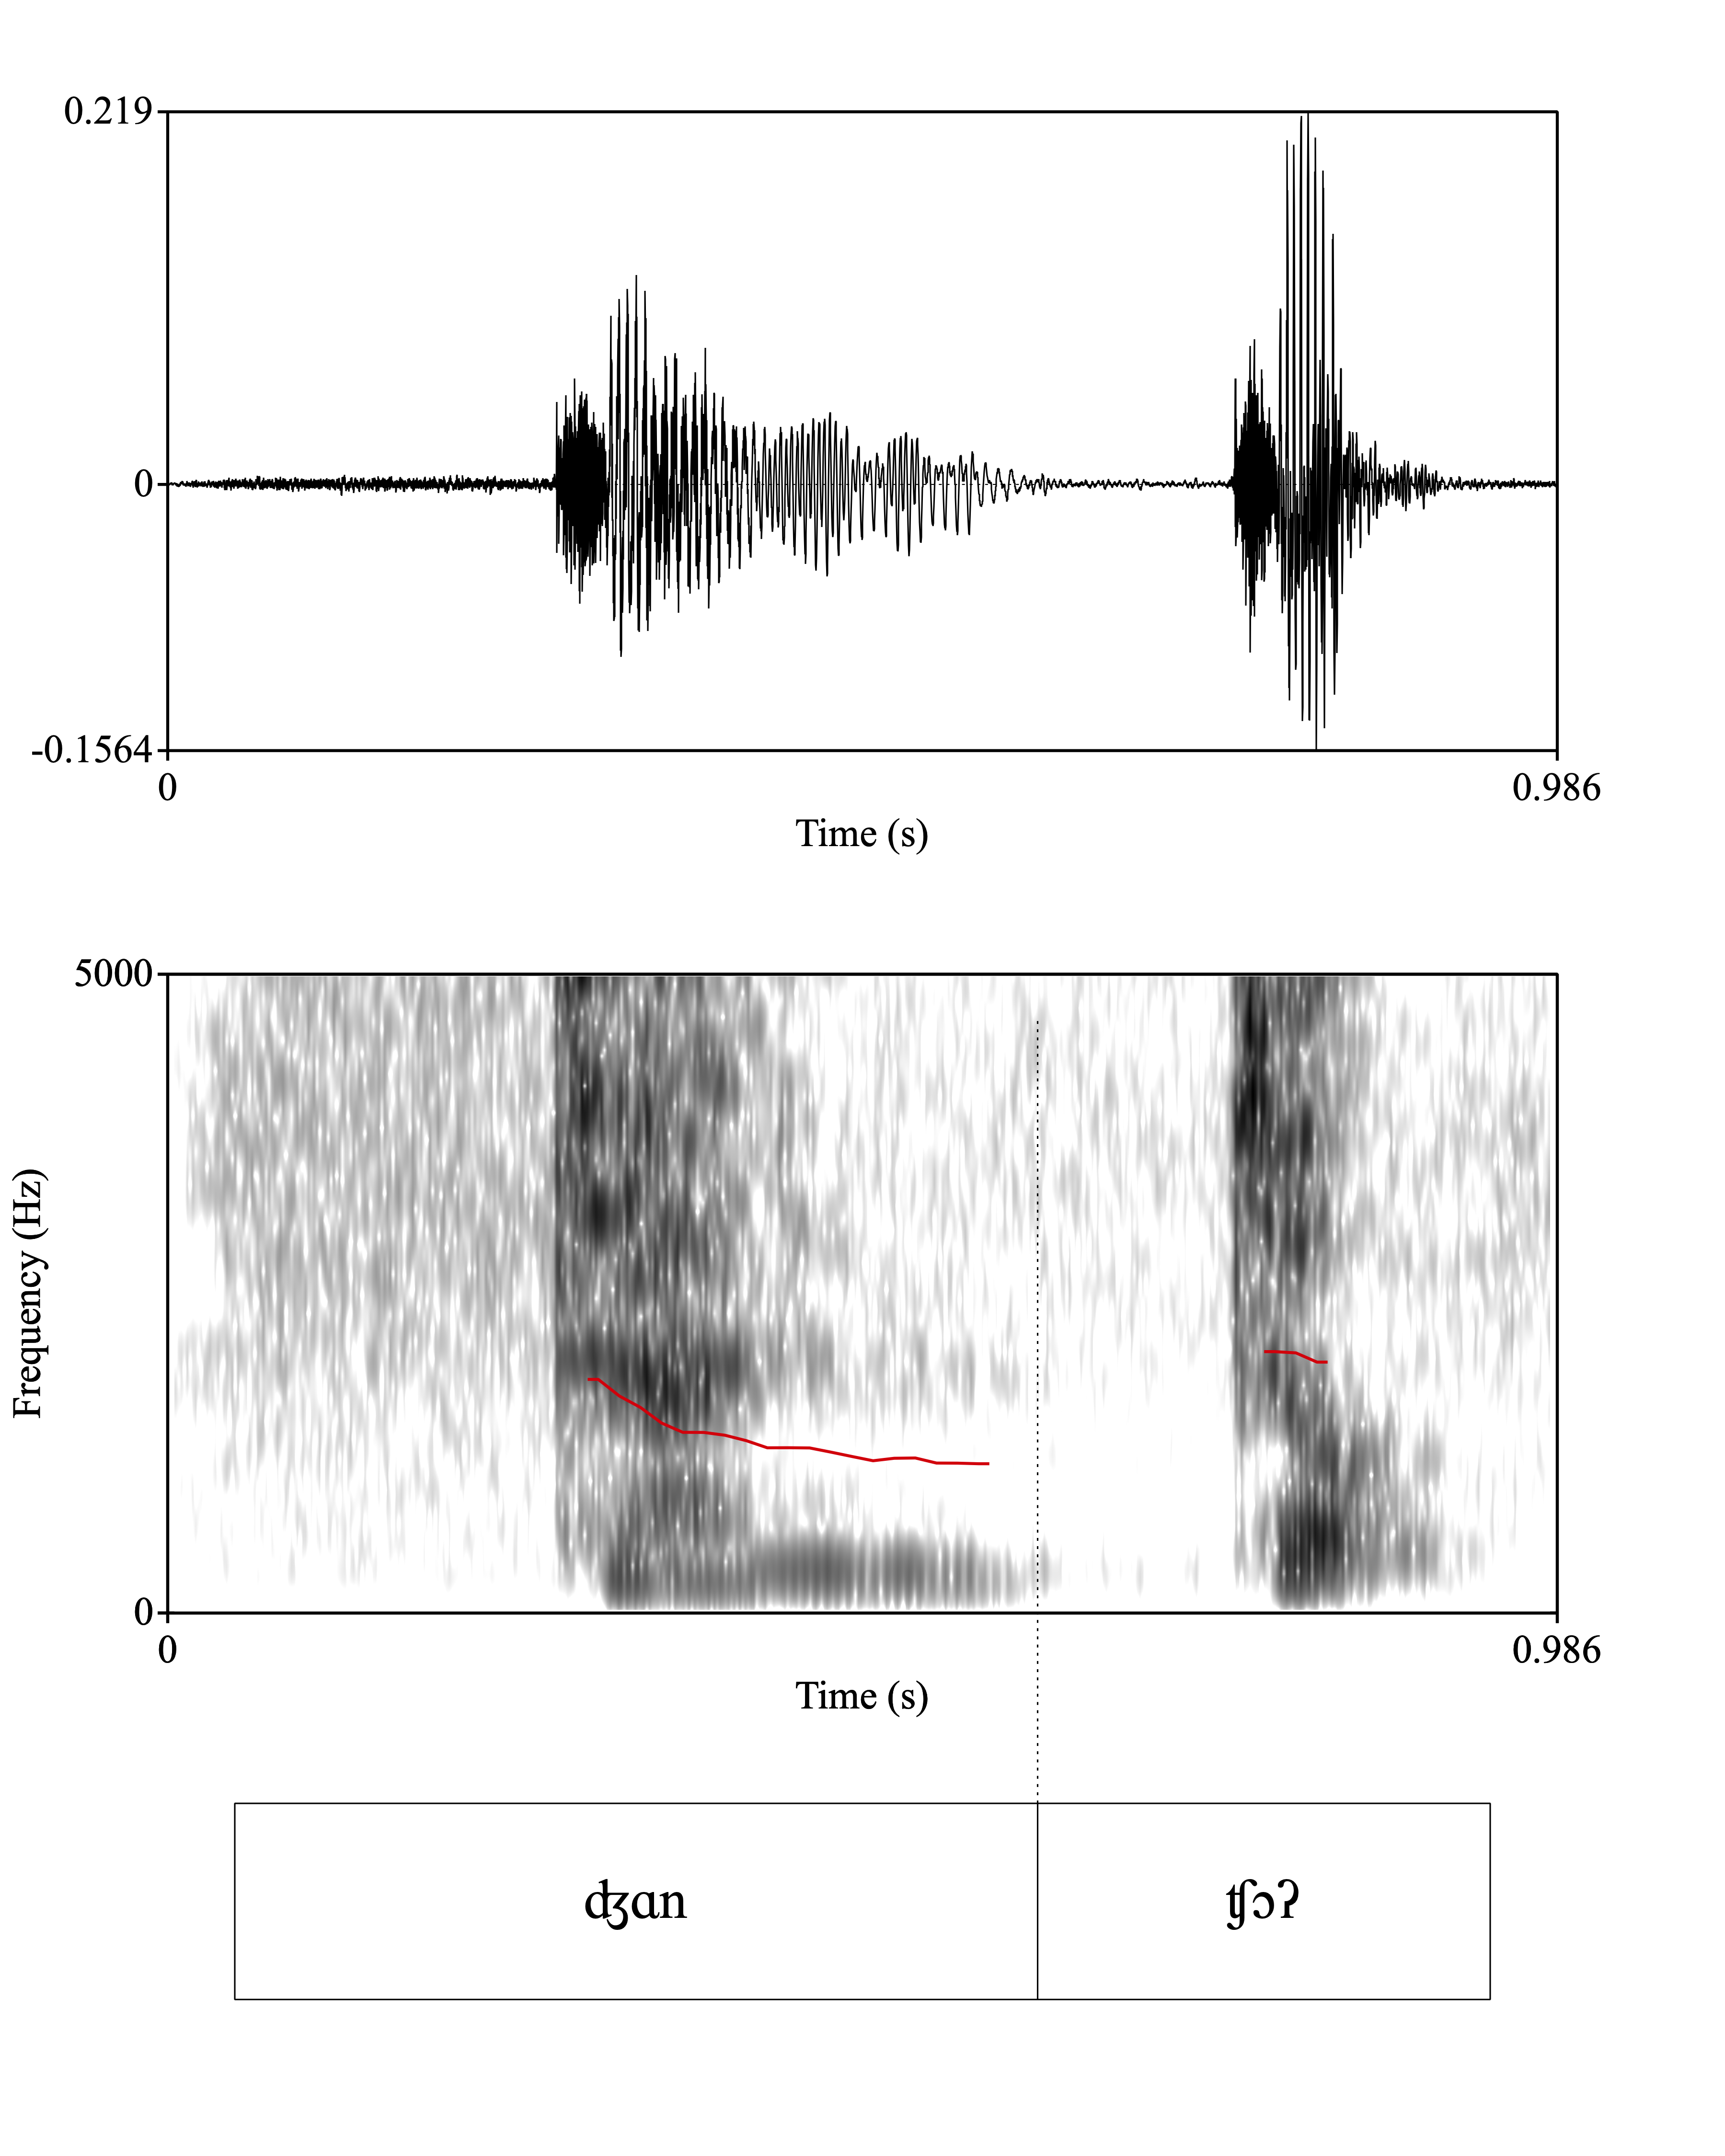

In [15]:
from IPython.display import display

# call speech analysis with Praat
display(Image("../img/praat.png"))